<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Project Solutions -- Logistic Regression
###  Breast Cancer Diagnostic
In this project, we are going to work with another very famous and real dataset on [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data). The dataset is available on kaggle and originally belong to [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).<br>
This dataset was donated to UCI by Nick Street in 1995 for the public use. [Relevant Papers](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) and [detailed description](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) on the dataset is provided at UCI website.<br>

Our target it to train a Logistic Regression model that can predict weather the cancer is benign (B) or malignant (M).<br>
Let's start the project!

**Let's import some libraries first!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # just optional!
%matplotlib inline

**Read the data into a dataframe `df`**

In [2]:
df = pd.read_csv('Breast_Cancer_Diagnostic.csv')

*We will only consider ten real-valued features in this project for diagnostic!<br>
Let's separate the required features along with diagnosis column.*

In [3]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]

**Check the head of your data**

In [4]:
# code her please so than you don't lose the existing output 

In [5]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


**Can you tell how many entries you have in your data and is their any missing value?**

In [6]:
# code her please so than you don't lose the existing output 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
diagnosis                 569 non-null object
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


**Get a summary on basic statistics for your data**

In [8]:
# code her please so than you don't lose the existing output 

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


**How many unique targets we have to predict?**

In [10]:
# code her please so than you don't lose the existing output 

In [11]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

**Which type of breast cancer is common?** Hint: `value_counts()`

In [12]:
# code her please so than you don't lose the existing output 

In [13]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Please, recreate the plot below**

In [14]:
# code her please so than you don't lose the existing output 

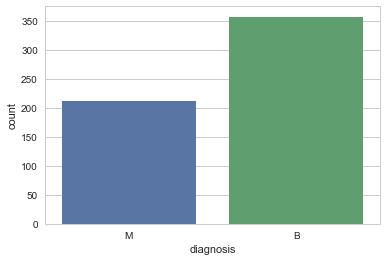

In [15]:
sns.countplot(df['diagnosis'])

**Recreate the plot below to overview your entire dataset**

In [16]:
# code her please so than you don't lose the existing output 

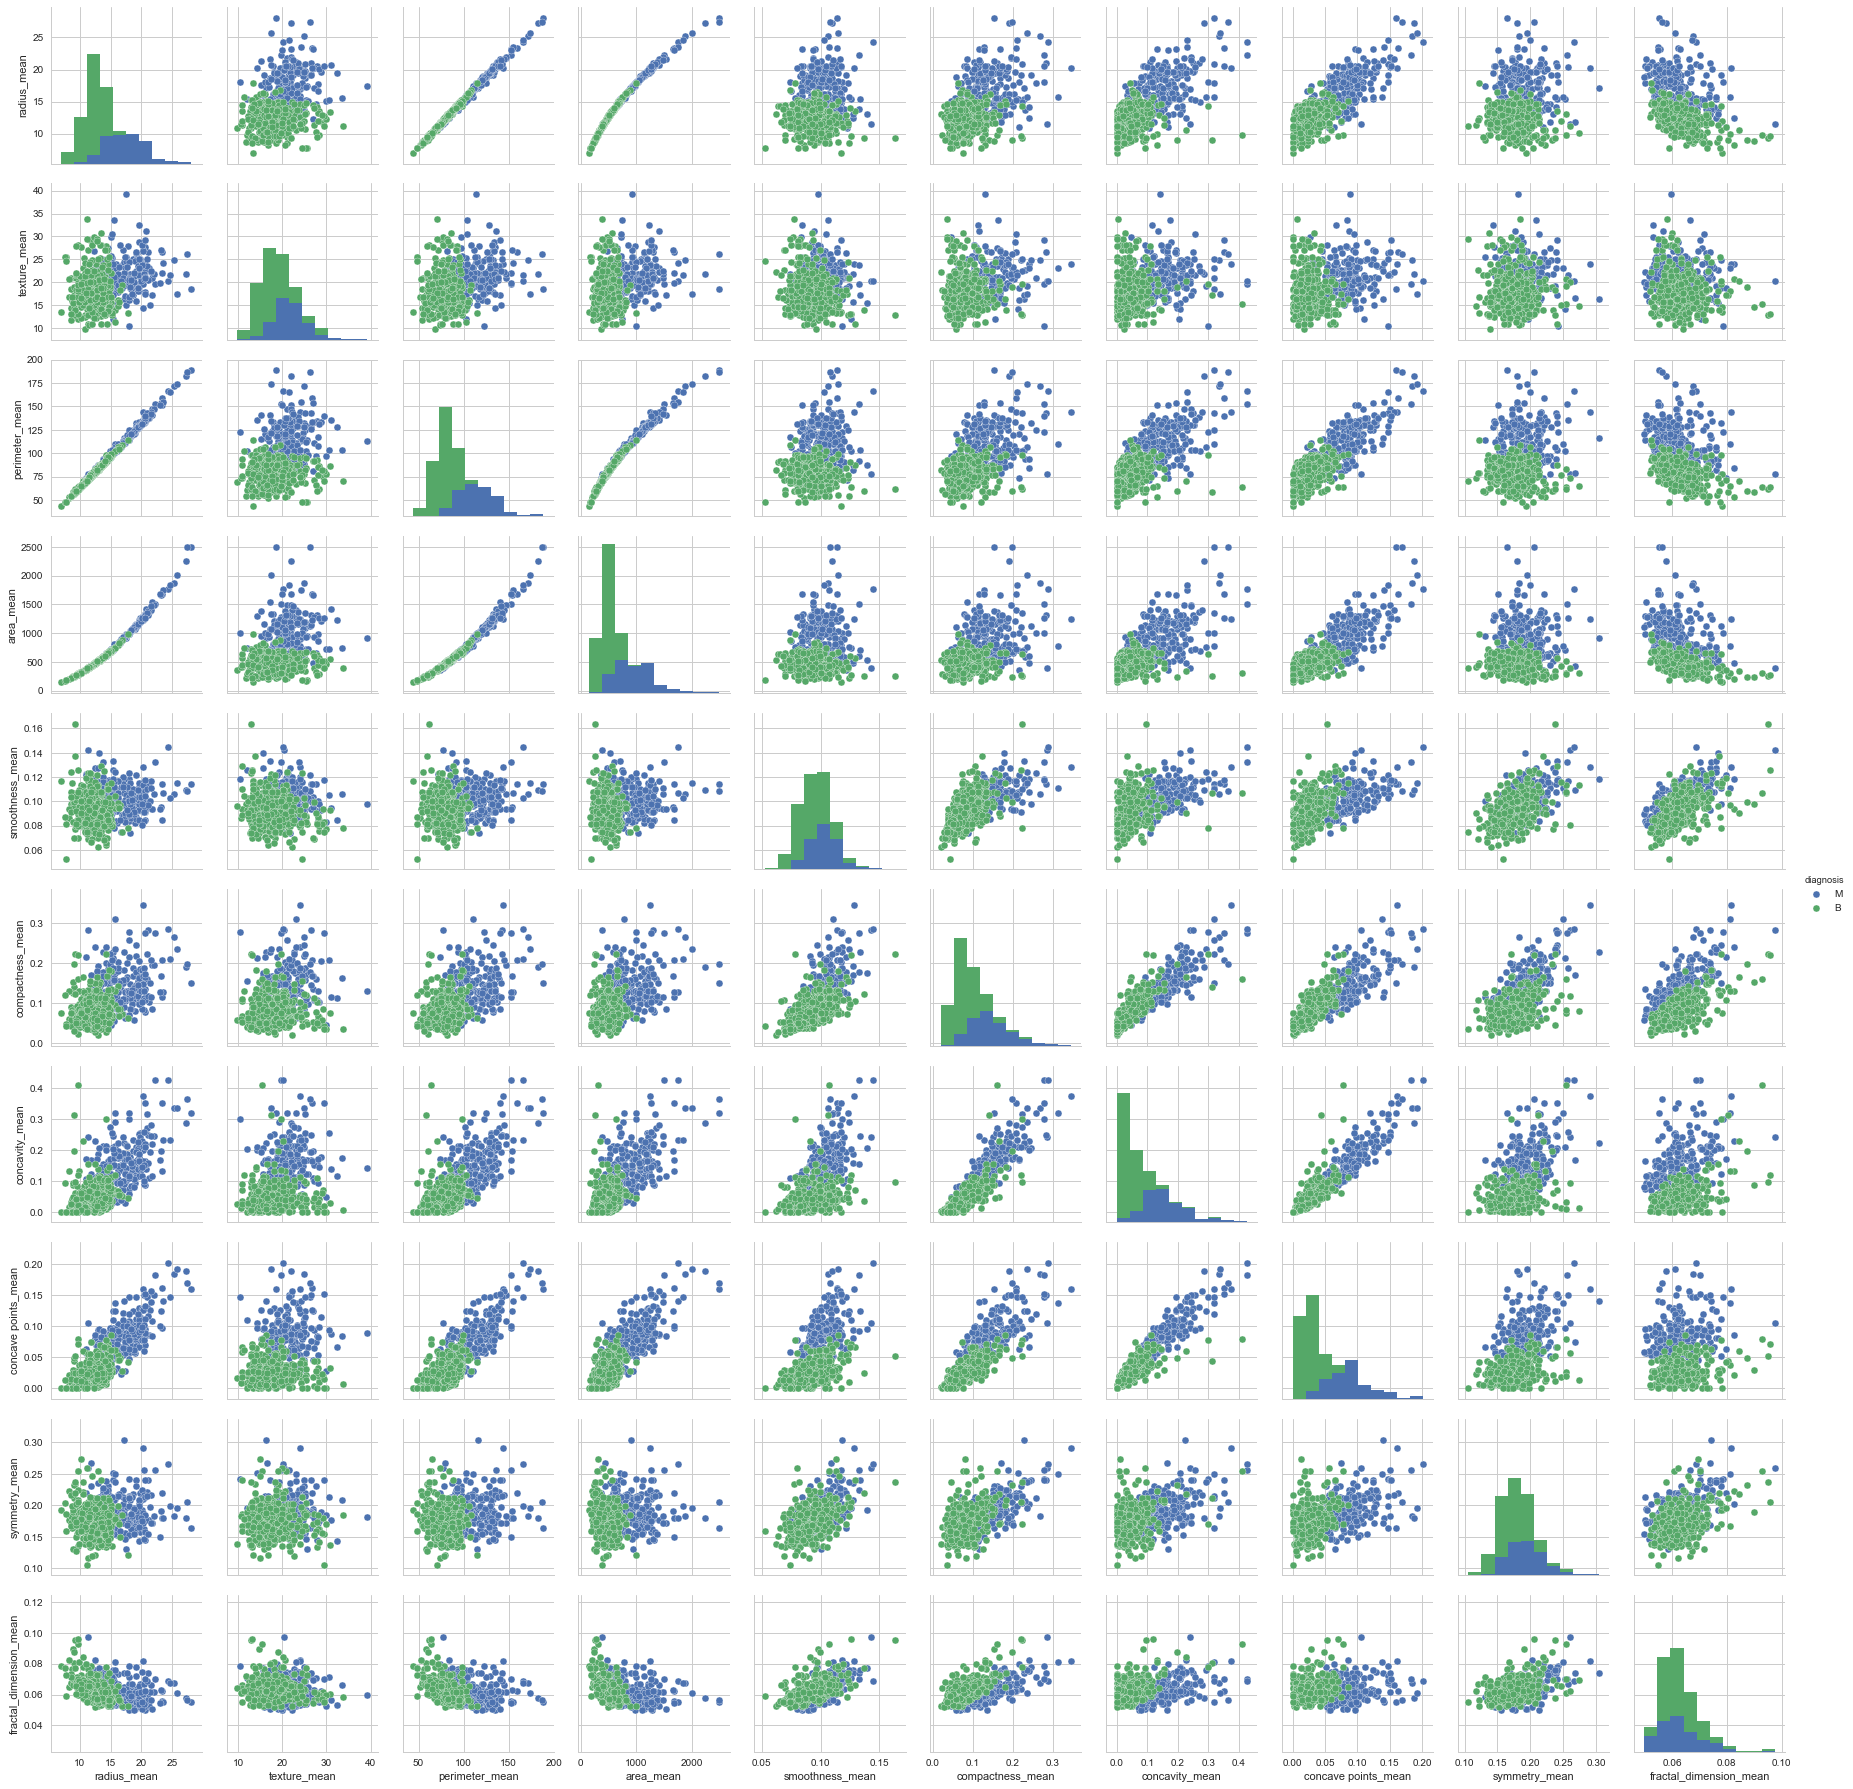

In [17]:
#plt.figure(figsize=(12,8))
#sns.heatmap(df.corr(), annot=True)
sns.pairplot(df, hue='diagnosis')

## Machine Learning 

**Please import `train_test_split()` method.**

In [18]:
# code her please so than you don't lose the existing output 

In [19]:
from sklearn.model_selection import train_test_split

**Separate data into features and target datasets.**

In [20]:
# code her please so than you don't lose the existing output 

In [21]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

**Split the data into train test datasets**

In [22]:
# code her please so than you don't lose the existing output 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

**Please import `LogisticRegression` and create its instance.**

In [24]:
# code her please so than you don't lose the existing output 

In [25]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

**How to fit a logistic regression model on the training dataset.**

In [26]:
# code her please so than you don't lose the existing output 

In [27]:
logR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Predict values for the testing data.**

In [28]:
# code her please so than you don't lose the existing output 

In [29]:
predictions = logR.predict(X_test)

**Create a classification report for the model, also import the required module for this purpose.**

In [30]:
# code her please so than you don't lose the existing output 

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          B       0.94      0.95      0.95       108
          M       0.92      0.90      0.91        63

avg / total       0.94      0.94      0.94       171



**Could you please display the confusion matrix?**

In [32]:
# code her please so than you don't lose the existing output 

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
print(confusion_matrix(y_test, predictions))

[[103   5]
 [  6  57]]


# Excellent work!
We are done with Logistic Regression Section! 